# Exam - Kmeans implementation profiling and optimization

For this course exam, we ask you to send us your work on the following exercise.
Please send a notebook named **name_surname.ipynb** at wandrille.duchemin [at] unibas.ch **at most 1 week after the end of the course**.

<br>

---

<br>

We have have a script called `Kmeans.py`, implementing a Kmeans algorithm (it should be in the same folder as this notebookif you cloned the course's github repository, otherwise you can grab it [there](https://github.com/sib-swiss/intermediate-python-training/blob/main/course2/Kmeans.py)). 
We provide some code below to generate some data and run it.

The goal of this exam is to profile and then modify it so it runs faster.

In [10]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
# Generating some random data.

def generateCluster(n, means, sds):
    P = np.random.randn(len(means), n)
    for i in range(len(means)):
        P[i,] = P[i,] * sds[i] + means[i]
    
    return P


clusterSizes = [4000, 2000, 4000, 4000, 2000]
clusterMeans = [ [0, -2], [3, 3], [-1, 3], [-5, 0], [5,-1]]
clusterSDs = [[0.5,1], [1,0.5], [0.5,0.5], [2,1], [1,1]]
C = []
A = []
for i in range(len(clusterSizes)):
    C.append(generateCluster(clusterSizes[i], clusterMeans[i], clusterSDs[i]))
    A += [i]*clusterSizes[i]
Points = np.concatenate(C, axis=1)
realAssignment = np.array(A)

**Performing Kmeans:**

<Axes: >

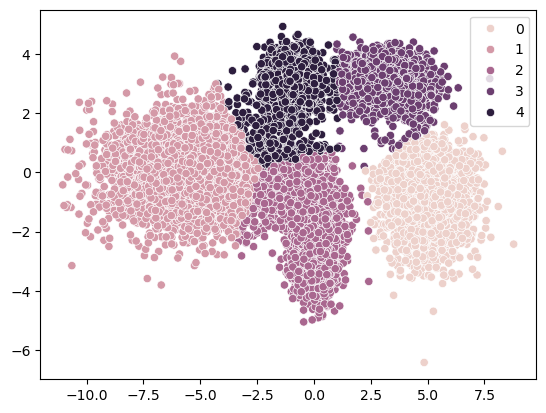

In [17]:
from Kmeans import Kmeans

k = 5
kmeanAssignment = Kmeans(Points, k, maxNbRounds=1000)

# plotting results (NB: Kmeans is not a deterministic algorithm, so it is normal if you get different results)
sns.scatterplot( x = Points[0,:] , y = Points[1,:] , hue = kmeanAssignment )

### step 1 - profiling

Here are the functions which look like the best candidates for optimization:
* `computeDistanceToCentroid`: compute the distance between a point and a centroid.
* `computeNearestCentroid`: compute which centroid is the closest to each point (actually
  calls `computeDistanceToCentroid`, but also possess some other potentially costly computations).
* `computeCentroids`: computes the position of the centroid of a points with a given cluster assignment.

Perform some profiling of the Kmeans implementation.

Are they really the best candidate ? which one should we go for first ?

### step 2 - optimization

Once you have decided on which function should be the primary target for optimization, try to rewrite it with some of what we have seen during this course so it runs faster.

Check your results as well as the effect it has on the whole Kmeans performance.

> NB: code optimization can be a form of "endless" task in the sense that one can always apply this or that technique on such and such parts of the code to squeeze a bit of performance. For the scope of this exam, you can limit yourselve to trying a few techniques on a single function and see what works and what doesn't.